### Term Deposit Sale - Ensemble Methods

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


### Attribute Information:

#### Input variables:

#### bank client data:
1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single' ; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'primary','secondary', 'tertiary' ,'unknown')
5.  default: has credit in default? (categorical: 'no','yes')

6.  balance : average yearly balance in euros (numeric) 
7.  housing: has housing loan? (categorical: 'no','yes')
8. loan: has personal loan? (categorical: 'no','yes')
#### related with the last contact of the current campaign:
9.  contact: contact communication type (categorical: 'cellular','telephone','unknown') 
10. day : last contact day of the month
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15.  previous: number of contacts performed before this campaign and for this client (numeric)
16.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success','other')


#### Output variable (desired target):

17.  y - has the client subscribed a term deposit? (binary: 'yes','no')

#### Deliverables

help in promoting to customers who are likely to buy or not

1. who are people likely to take?
2. who are not?

pattern between independent attribute and target

1. EDA report 
how, what and findings
 - univariate analysis (skew, outliers, missing values, strategy to resolve this)
 - Multivariate analysis (pair plot)  - plot individually
  - comments on attributes which have strong relation ship with target
  - how attributes are interacting with each other
  - presence of leverage points 
  - make use of visual techniques as much as possible

2. how did we load the dataset.
   - Challenges faced during loading
   - datatype should be numerical
   - transform and scale the data if required (z-score/min-max scorer etc) and explain why we are doing it
   - create training and test set with 70:30 ratio

3. Create an ensemble
  - create using a standard classification algorithm and evaluate the performance in terms of class level metrics and overall accuracy
  - build ensemble, compare performance with base model as well as within ensemble technique
  - each instance within the ensemble should be different from each other and should be highly overfit
  - and explain why you used it with comments 

4. Tune the model
  - identify the key hyperparameters avaiable for the selected alogithm and choose the appropriate values
  - Regularization techniques used for the model
  - Range estimate at 95% confidence for the model performance in production

### EDA (Exploratory Data Analysis)
####  Import Libraries
First we import necessary packages like pandas, numpy, seaborn, matplotlib etc

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split, cross_val_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,  RandomForestClassifier, GradientBoostingClassifier

#Evaluation Metrics
import sklearn.metrics as m
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from sklearn.model_selection import GridSearchCV



#### Read Dataset

The values within the data set are seperated by a semi-colon (";"), so we should be using "sep = ';'" while reading the dataset 

In [3]:
df = pd.read_csv(r"bank\bank-full.csv",sep=";")

#### Sneak-peek at the data:
Let us look at the top few rows to understand the variables and the nature of data

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Check for Missing Values and Unique Values
So let us check and count the number of missing values in each of the columns. 

In [6]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
age,0,77,int64
job,0,12,object
marital,0,3,object
education,0,4,object
default,0,2,object
balance,0,7168,int64
housing,0,2,object
loan,0,2,object
contact,0,3,object
day,0,31,int64


#### Categorical and Numerical Variables

In [7]:
def numerical_features(df):
    #let's find out the number of numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    return numerical_feature_columns

def categorical_features(df):
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    return categorical_feature_columns

In [8]:
numerical_feature_columns = numerical_features(df)
numerical_feature_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [9]:
categorical_feature_columns = categorical_features(df)
categorical_feature_columns

['y',
 'housing',
 'job',
 'marital',
 'default',
 'loan',
 'education',
 'poutcome',
 'contact',
 'month']

In [10]:
for i in categorical_feature_columns:
    print("----------------------------------------")
    print("Value counts for :",i)
    print("----------------------------------------")
    print(df[i].value_counts())

----------------------------------------
Value counts for : y
----------------------------------------
no     39922
yes     5289
Name: y, dtype: int64
----------------------------------------
Value counts for : housing
----------------------------------------
yes    25130
no     20081
Name: housing, dtype: int64
----------------------------------------
Value counts for : job
----------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
Value counts for : marital
----------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
Value counts for : default
----------------------------------

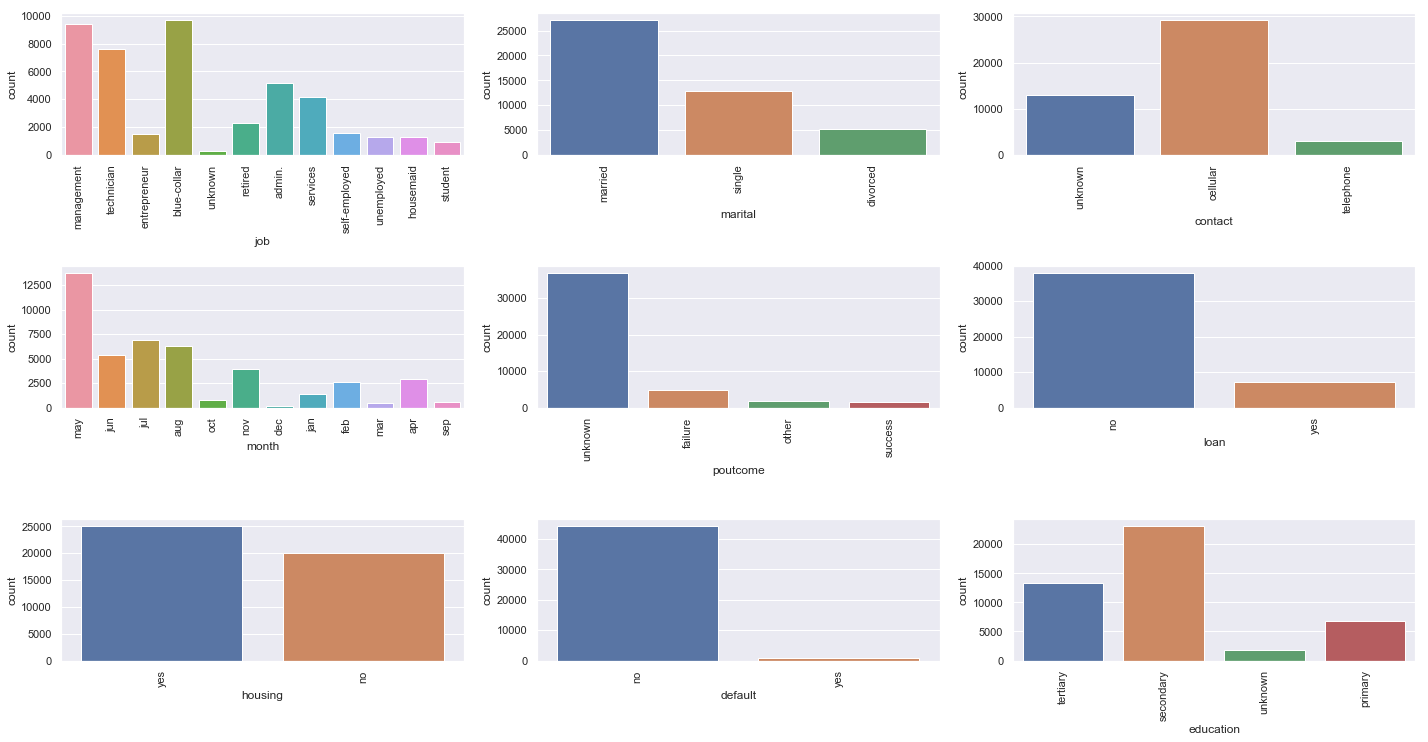

In [11]:

categorical_feature_columns = ['job','marital','contact','month' ,'poutcome','loan','housing', 'default', 'education']
target = 'y'
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_feature_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot,data=df)
    plt.tight_layout() #Used for padding between subplots
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

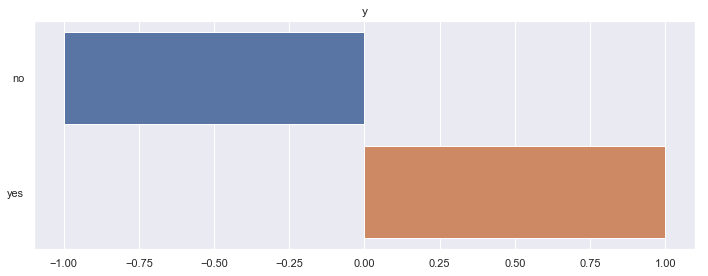

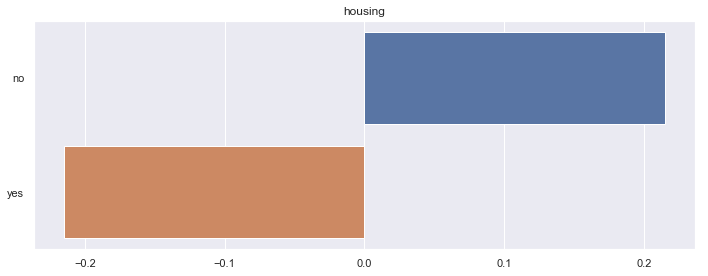

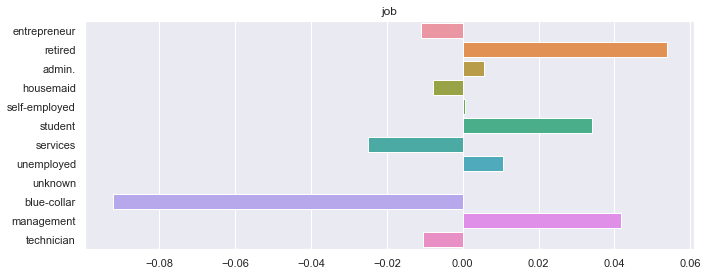

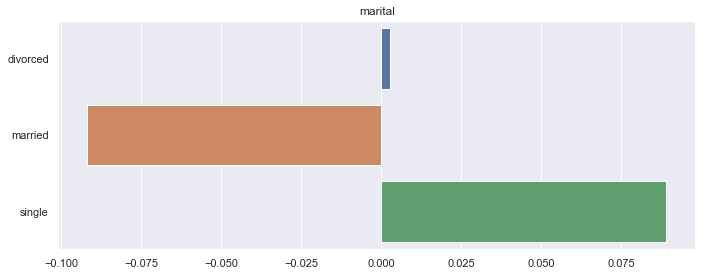

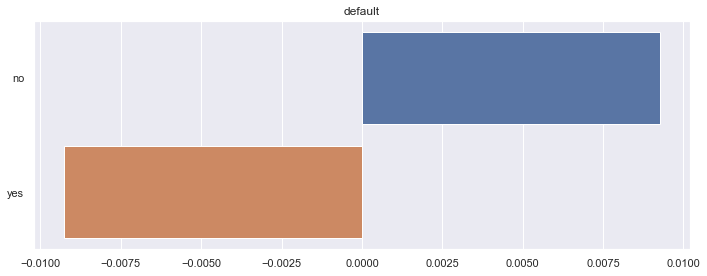

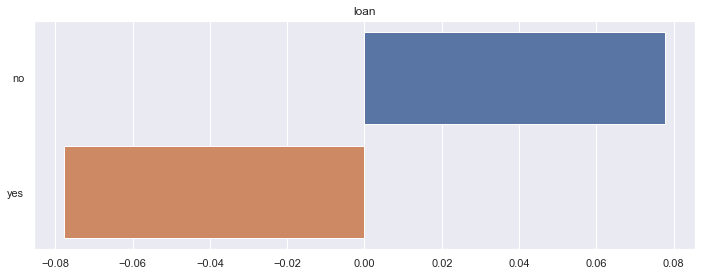

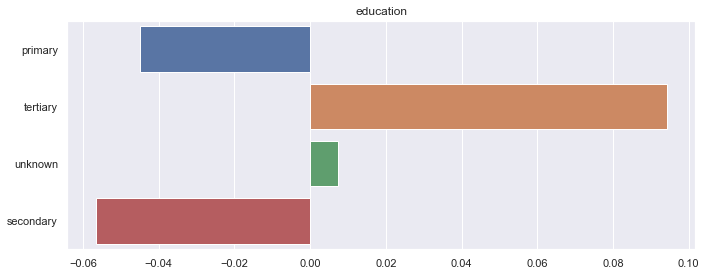

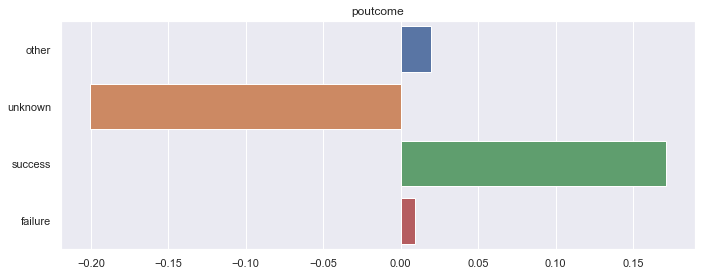

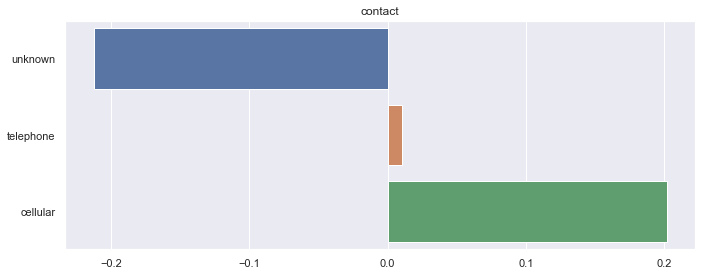

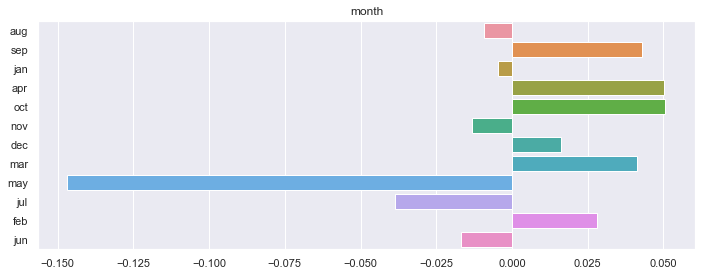

In [12]:

categorcial_variables = list(set(df.columns) - set(df._get_numeric_data().columns))

for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

### Observations
- There are 17 columns and 45211 rows in the dataset
- This dataset contains many categorical variables of object type, these need to be converted into numerical type
- There are no missing values in the dataset. 
- However education , job, contact and poutcome contains the value as "unknown" which can be considered as missing data.We could impute these values upon further analysis.
- The unknown values in poutcome and contact are considerably high when comapared to education and job.
- There are many ways to handle missing data. 
    - One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.
    - Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.


## Imputation
Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [13]:
pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


#### Inferring education from jobs : 

From the cross-tabulation, it can be seen that people with management jobs usually have education as 'tertiary'. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'tertiary'.

Similarly, 
- 'job' = 'technician' --> 'education' = 'secondary' 
- 'job' = 'housemaid' --> 'education' = 'primary'
- 'job' = 'blue-collar' --> 'education' = 'secondary'

In [14]:
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='admin'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'primary'
df.loc[(df['education']=='unknown') & (df['job']=='self-employed'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='student'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='unemployed'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='retired'), 'education'] = 'secondary'

In [15]:
df["education"].value_counts()

secondary    24209
tertiary     13808
primary       6896
unknown        298
Name: education, dtype: int64

In [16]:
df['job'][df['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

#### Inferring jobs from age: 
As we see, if 'age' > 60, then the 'job' is 'retired,' so we would impute those values as 'retired'

In [17]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

### Statictical Summary for Numerical Columns
Let us look at the distribution of data in each of these columns using summary statictics

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Observations
1. First, we need to check difference between mean and median (50th percentile) for 
    - age, there is no significant difference in these values, so the distribution can be assumed to be close to normal.
    - balance, the difference between mean and median values are too high and the data looks to be right skewed with high median value. This indicates that there could be outliers in the balance column
    - day, there is no significant difference in these values, so the distribution can be assumed to be close to normal.
    - duration, the difference between mean and median values are too high
    - campaign, there is no significant difference in these values
    
2. There seems to be few outliers in numerical columns. Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that only 'age', 'campaign' , balance have outliers as max('age'), max('campaign'), max('balance') > 1.5Q3('age'), >1.5Q3('campaign') and 1.5Q3 ('balance') respectively.
3. The std deviation of balance is 3044, which indicates high spread in data for this field.
4. pdays, there are many values with -1 where the client might not have been previously contacted or missing values
5. previous, even here there are many values with 0, indicating most of the clients were not contacted before this campaign

#### Univatiate Analysis

Lets plot the histogram for all the columns to understand the ditribution of the data within each columns

In [19]:
def density_plots(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),3):
        if len(num_cols) > i+2:
            plt.figure(figsize=(10,3))
            plt.subplot(131)
            sns.distplot(df[num_cols[i]], hist=True, kde=True)
            plt.subplot(132)            
            sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
            plt.subplot(133)            
            sns.distplot(df[num_cols[i+2]], hist=True, kde=True)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(df[num_cols[i]], hist=True, kde=True)

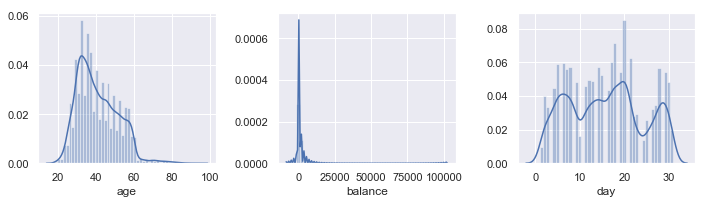

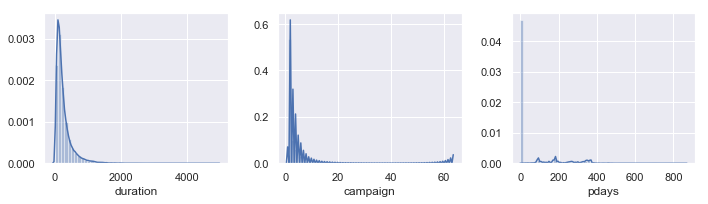

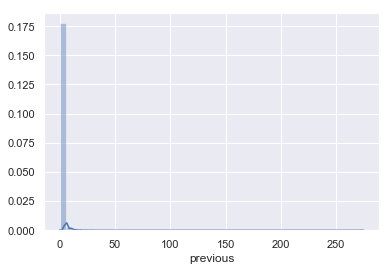

In [20]:
density_plots(df)

In [21]:
print(df[df['y'] == "yes"][['y',"balance"]].max())
print(df[df['y'] == "no"][['y',"balance"]].max())

y            yes
balance    81204
dtype: object
y              no
balance    102127
dtype: object


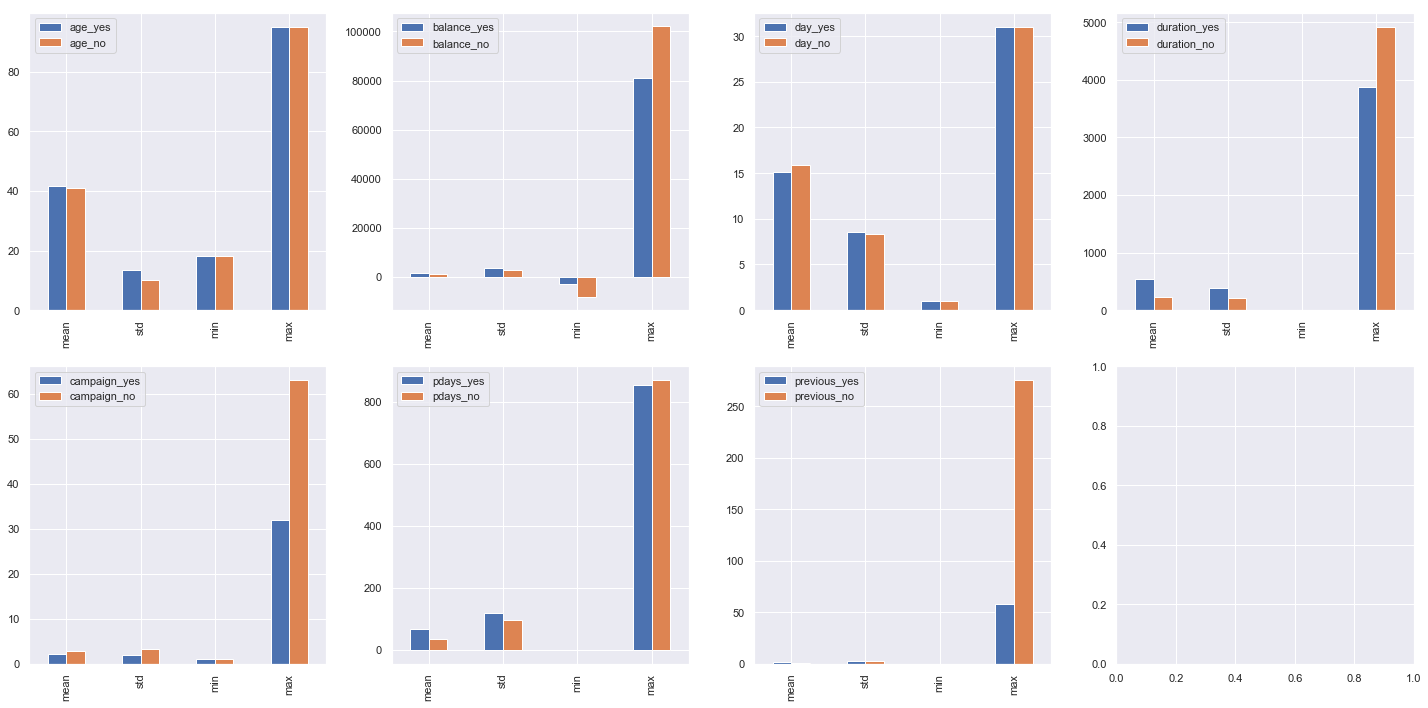

In [22]:
fig, ax = plt.subplots(2,4, figsize=(20, 10))

for i,subplot in zip(numerical_feature_columns, ax.flatten()):
    b_df = pd.DataFrame()
    col1 = i + "_yes"
    col2 = i + "_no"
    b_df[col1] = (df[df['y'] == "yes"][['y',i]].describe())[i]
    b_df[col2] = (df[df['y'] == "no"][['y',i]].describe())[i]
    b_df.drop(['count', '25%', '50%', '75%']).plot.bar(ax=subplot)
    fig.tight_layout()

### Observations

1. None of the numerical features are normally distributed, age is close to normal
2. balance, duration and campaign are right skewed
3. Independent variable 'day' seems to have multiple peaks
4. The scales are different for each features, it would be better to standardise the features to a standard scale
5. People who subscribed for term deposit have fewer number of contacts during campaign

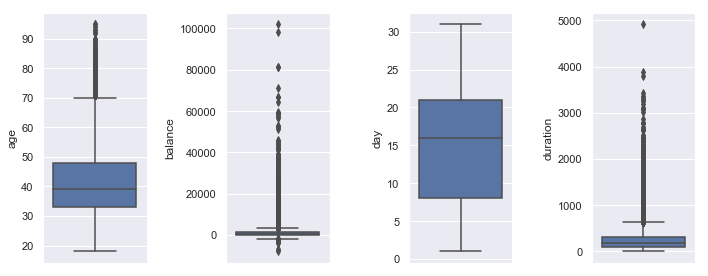

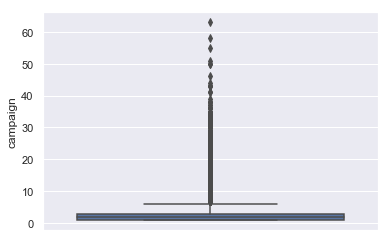

In [23]:
def box_plot(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),4):
        if len(num_cols) > i+3:
            plt.figure(figsize=(10,4))
            plt.subplot(141)
            sns.boxplot(x=df[num_cols[i]],orient='v')
            plt.subplot(142)            
            sns.boxplot(x=df[num_cols[i+1]],orient='v')
            plt.subplot(143)            
            sns.boxplot(x=df[num_cols[i+2]],orient='v')
            plt.subplot(144)            
            sns.boxplot(x=df[num_cols[i+3]],orient='v')
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(x=df[num_cols[i]],orient='v')
            

box_plot(df)

### Observations

- There are outliers in age, balance, duration and campaign.
- We could remove them or impute with mean / median values, but we would leave them as it as they are not so unrealistic.

In [24]:
#pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

As we can see from the above table, the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'unknown'. This could mean that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: p_days_missing, pdays_less_5, pdays_bet_5_15, and pdays_greater_15.

In [25]:
# #Add new categorical variables to our dataframe.
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==-1] = 1
df['pdays_less_5'][(df['pdays']> -1) & (df['pdays']<5)] = 1
df['pdays_greater_15'][(df['pdays']>15)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df.drop('pdays', axis=1, inplace=True)

### RelationShip of predictors with Target

Let us have a look at the target variable 'y'

Text(0.5,0,'y')

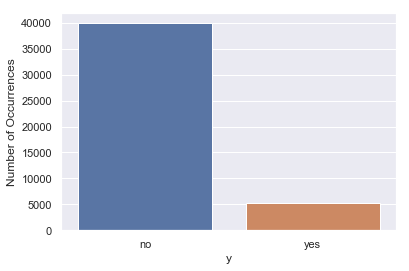

In [26]:

class_variable = df['y'].value_counts()

sns.barplot(class_variable.index,class_variable.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('y', fontsize=12)

In [27]:
100 * df['y'].value_counts() / df.shape[0]

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [28]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,previous,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
y,,,,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,0.502154,0.840890,0.001152,0.155854,0.002104
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,1.170354,0.639818,0.001702,0.356211,0.002269


### Inference
- From the counts looks like there are more number for rows (data) for customer who did not opt for Term Deposits than who opted those . There seems to be imbalance in the class

- The average age of customers who bought the term deposit is higher than that of the customers who didn't. 
- The average pdays, when the customer was last contacted is lower for the customers who bought it.This couls be a good feature to predict target.
- The average balance is higher for customers who brought the term deposit, but this could be due to ouliers as well.
- less campaigns were conducted to customers who brought the term deposit.

#### Stacked Bar Plot 

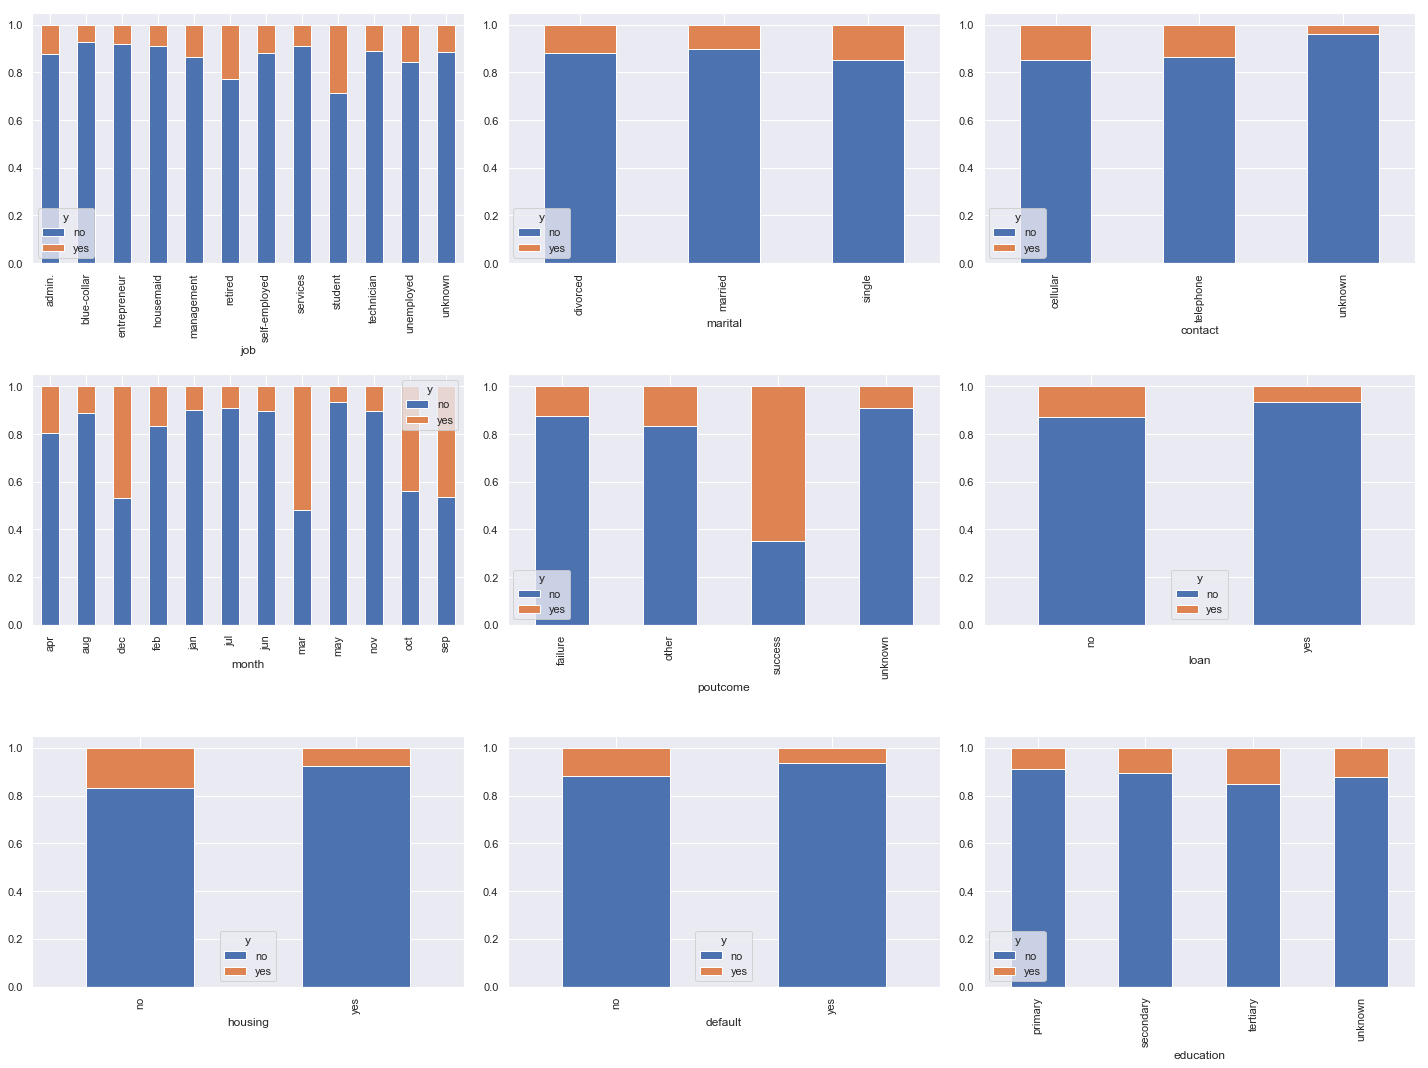

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

for i,subplot in zip(categorical_feature_columns, ax.flatten()):
    table=pd.crosstab(df[i],df.y)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=subplot)
    fig.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 
    
    

### Observations
1. Students and retired people tend to opt for term deposits compared to other professionals - job title can be a good predictor of the outcome variable
2. People with previous marketing campaign 'success' have higher changes of taking term deposits
3. Customers contacted during last quarter and during march have opted for term deposits
4. Customers without housing loan has high chances of opting term deposits than those with housing loans, housing loan can be a good predictor for the outcome variable
5. marital status does not seem a strong predictor for the outcome variable.
6. Education could be a good predictor for the outcome variable.

#### Convert Categorical values to numeric

In [30]:
df.y = [1 if x == "yes" else 0 for x in df.y]

In [31]:
# ## Convert Categorical values to numeric

cat_columns = ['housing','marital','contact','loan','job','poutcome','default']
for feature in cat_columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

Lets Use Label encoding to encode 'education' column as its a ordinal variable 

In [32]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['education','month']
lbl_enc = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: lbl_enc.fit_transform(col))

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,3,0,1,0,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,3,0,1,0,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,3,0,1,0,0,0
3,47,1,1,1,0,1506,1,0,2,5,8,92,1,0,3,0,1,0,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,3,0,1,0,0,0


#### Correlation between numerical variable and target 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
age                 45211 non-null int64
job                 45211 non-null int8
marital             45211 non-null int8
education           45211 non-null int64
default             45211 non-null int8
balance             45211 non-null int64
housing             45211 non-null int8
loan                45211 non-null int8
contact             45211 non-null int8
day                 45211 non-null int64
month               45211 non-null int64
duration            45211 non-null int64
campaign            45211 non-null int64
previous            45211 non-null int64
poutcome            45211 non-null int8
y                   45211 non-null int64
pdays_missing       45211 non-null int64
pdays_less_5        45211 non-null int64
pdays_greater_15    45211 non-null int64
pdays_bet_5_15      45211 non-null int64
dtypes: int64(13), int8(7)
memory usage: 4.8 MB


In [35]:
def correlation_matrix(df):
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(25,25))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

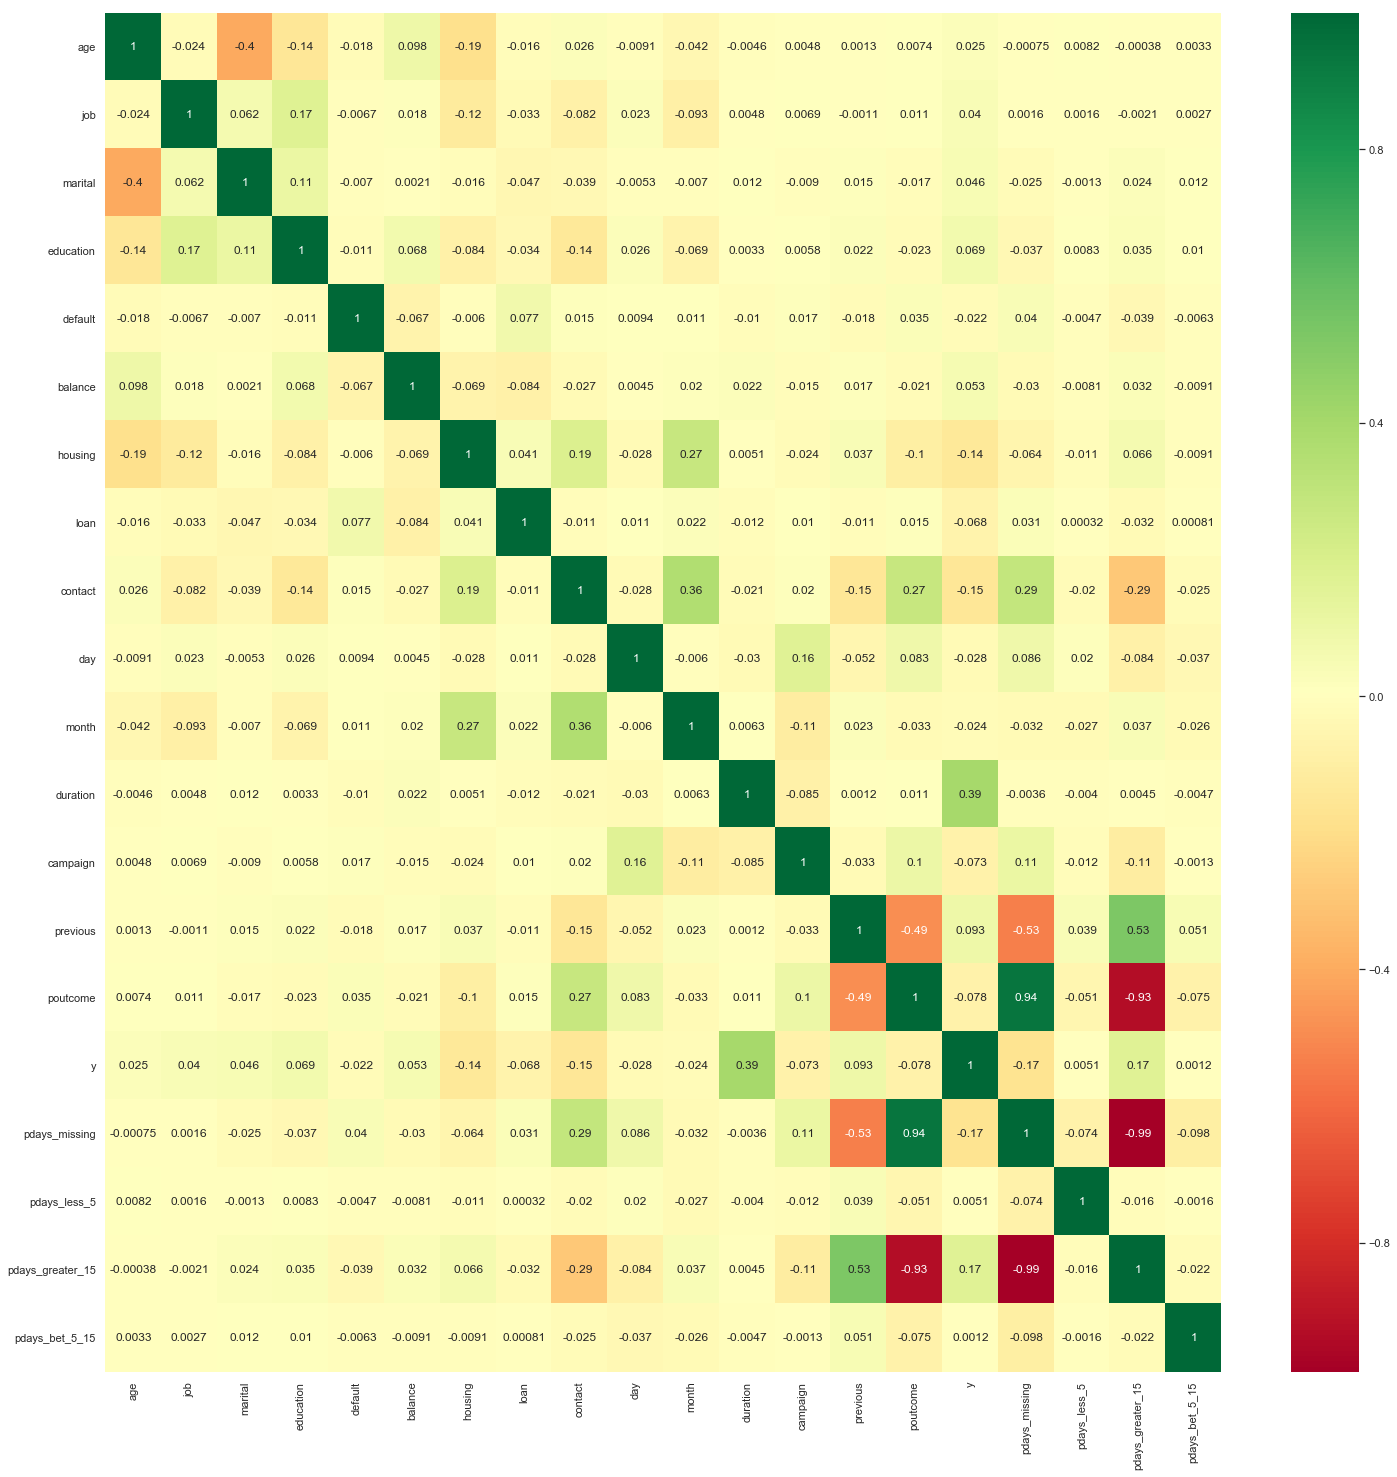

In [36]:
correlation_matrix(df)

- We dont see any correlation between variables in most of features
- We can see a high correlation between pdays and poutcome
- There is also correlation between pdays and previous

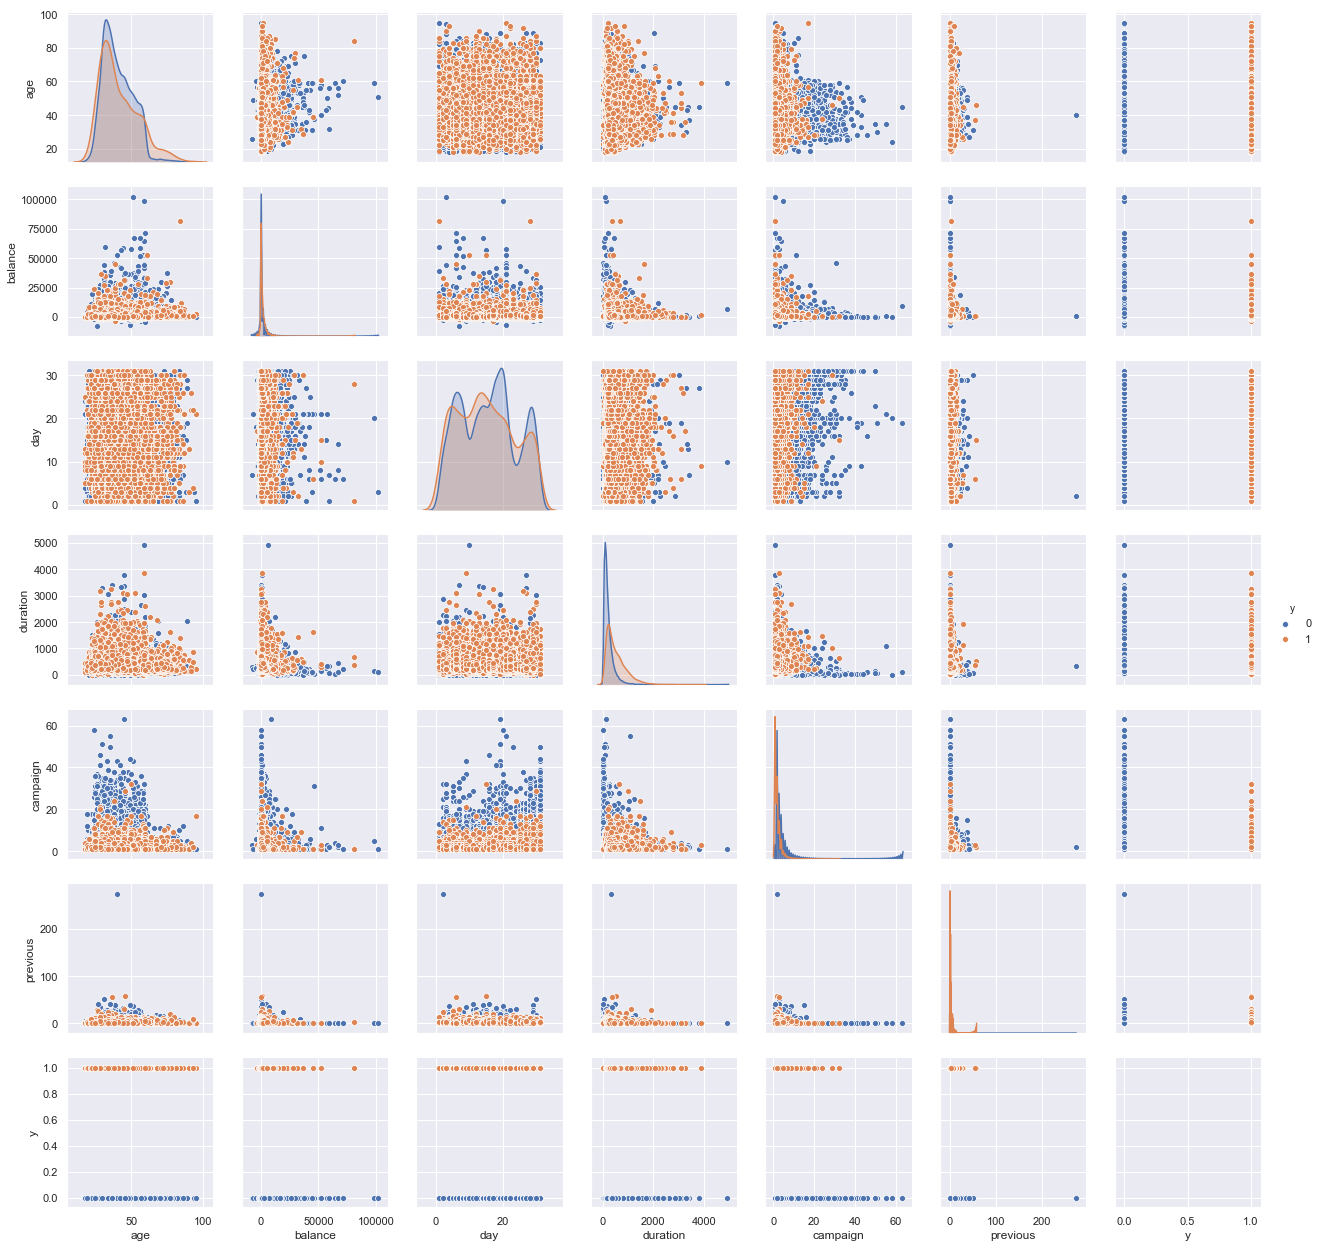

In [37]:
columns = ['age', 'balance', 'day', 'duration','campaign', 'previous','y']
sns.pairplot(data=df[columns],hue='y')

#### Observation
- There is no clear seperation of target classes and age, day, duration, pdays
- In the scatter plot between age and balance there seems to be three data points which are away from the other datapoints.
- We could see similar points with balance and other numerical columns, thats because there are couple of rows with high balance.
- Even duration column seems to have one data point with a high value, same is the case even with 'previous' column
- There is no linear seperation between any of the columns


#### Seperate Independent and Dependent variables

In [38]:
target = 'y'
X = df.loc[:, df.columns!=target]
y = df.loc[:, df.columns==target]

In [39]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,3,1,0,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,3,1,0,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,3,1,0,0,0
3,47,1,1,1,0,1506,1,0,2,5,8,92,1,0,3,1,0,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,3,1,0,0,0


In [40]:
# Now let us try to scale the variables
from scipy.stats import zscore

X.dtypes
numeric_cols = X.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
X[numeric_cols] =X[numeric_cols].apply(zscore)

In [41]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,1.606965,4,1,1.233964,0,0.256419,1,0,2,-1.298476,0.823773,0.011016,-0.569351,-0.25194,3,0.472694,-0.0349,-0.467398,-0.046129
1,0.288529,9,2,-0.245726,0,-0.437895,1,0,2,-1.298476,0.823773,-0.416127,-0.569351,-0.25194,3,0.472694,-0.0349,-0.467398,-0.046129
2,-0.747384,2,1,-0.245726,0,-0.446762,1,1,2,-1.298476,0.823773,-0.707361,-0.569351,-0.25194,3,0.472694,-0.0349,-0.467398,-0.046129
3,0.571051,1,1,-0.245726,0,0.047205,1,0,2,-1.298476,0.823773,-0.645231,-0.569351,-0.25194,3,0.472694,-0.0349,-0.467398,-0.046129
4,-0.747384,11,2,2.713654,0,-0.447091,0,0,2,-1.298476,0.823773,-0.233620,-0.569351,-0.25194,3,0.472694,-0.0349,-0.467398,-0.046129


### Baseline Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2,stratify=y)

In [43]:
classifiers = [
    KNeighborsClassifier(29),
    SVC(kernel="rbf",probability=True,random_state=2),
    DecisionTreeClassifier(random_state=2),
    RandomForestClassifier(random_state=2),
    AdaBoostClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    GaussianNB(),
    LogisticRegression(random_state=2)
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy Train", "Accuracy Test", "Log Loss Train", "Log Loss Test",
          "Precision Score Train", "Precision Score Test","Recall Score Train","Recall Score Test", 
          "roc-auc Score Train", "roc-auc Score Test","F1-Score Train","F1-Score Test"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    y_pred_train = clf.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    train_predictions = clf.predict_proba(X_train)
    ll_train = log_loss(y_train, train_predictions)
    
    precision_train = m.precision_score(y_train,y_pred_train,average='macro')
    recall_train = m.recall_score(y_train,y_pred_train,average='macro')
    roc_auc_train = m.roc_auc_score(y_train,y_pred_train)
    f1_score_train = m.f1_score(y_train,y_pred_train,average='macro')
    
    #################Evaluation Metrics for test dataset###########################
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    test_predictions = clf.predict_proba(X_test)[:,1]
    ll = log_loss(y_test, test_predictions)
    
    precision = m.precision_score(y_test,y_pred,average='macro')
    recall = m.recall_score(y_test,y_pred,average='macro')
    roc_auc = m.roc_auc_score(y_test,y_pred)
    f1_score = m.f1_score(y_test,y_pred,average='macro')
    
    #log_entry = pd.DataFrame([[name, acc*100, ll,precision,recall,roc_auc,f1_score]], columns=log_cols)
    log_entry = pd.DataFrame([[name,acc_train*100, acc*100, ll_train, ll,
                               precision_train, precision ,recall_train , recall,
                               roc_auc_train, roc_auc,f1_score_train, f1_score]], columns=log_cols)
    
    log = log.append(log_entry)
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['Accuracy Test'])



,Accuracy Train,Accuracy Test,Log Loss Train,Log Loss Test,Precision Score Train,Precision Score Test,Recall Score Train,Recall Score Test,roc-auc Score Train,roc-auc Score Test,F1-Score Train,F1-Score Test
Classifier,,,,,,,,,,,,
GaussianNB,80.266692,79.703627,7.424265e-01,0.772954,0.620244,0.614843,0.692120,0.686099,0.692120,0.686099,0.637951,0.631373
DecisionTreeClassifier,100.000000,87.009732,9.992007e-16,4.486734,1.000000,0.688275,1.000000,0.696039,1.000000,0.696039,1.000000,0.692027
KNeighborsClassifier,90.138086,89.368918,2.171821e-01,0.389539,0.813390,0.768602,0.622761,0.600620,0.622761,0.600620,0.663528,0.633290
AdaBoostClassifier,89.777862,89.508994,6.600530e-01,0.660019,0.762903,0.751881,0.664426,0.661268,0.664426,0.661268,0.697619,0.692356
SVC,90.612064,89.693306,2.683043e-01,0.288936,0.831293,0.778566,0.641966,0.621042,0.641966,0.621042,0.687167,0.657914
LogisticRegression,90.071729,89.884990,2.528479e-01,0.256952,0.785967,0.776516,0.647577,0.644539,0.647577,0.644539,0.686665,0.682112
RandomForestClassifier,99.168958,89.899735,5.741404e-02,0.547851,0.993689,0.772102,0.966002,0.655555,0.966002,0.655555,0.979309,0.691744
GradientBoostingClassifier,90.947009,90.187260,2.061633e-01,0.216036,0.806458,0.779138,0.695535,0.673582,0.695535,0.673582,0.734143,0.709179


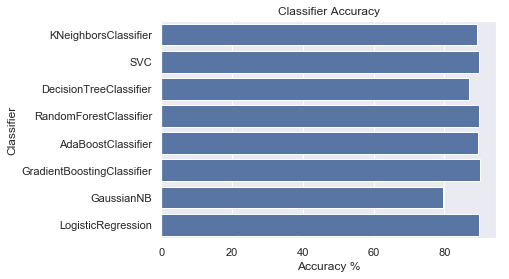

In [43]:
##Barplots display

sns.barplot(x='Accuracy Test',y=log.index ,data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Since the class is imbalanced, we will not use accuracy as the performace measure, rather we would use AUC score.

GradientBoostingClassifier have a better accuracy and roc_auc_score compared to other base models. 
So lets use this model and fine tune the hyperparameters further to evaluate the performance in terms of class level metrics and overall accuracy 

## GradientBoostingClassifier

Lets now try to fine tune and evaluate GradientBoostingClassifier

In [44]:
columns = list(df.columns)
columns.remove('y')

Accuracy of the GBM on test set: 0.903
ROC AUC Score of the GBM on test set: 0.673
Precision recall AUC Score of the GBM on test set: 0.547
             precision    recall  f1-score   support

          0       0.92      0.97      0.95     11977
          1       0.65      0.37      0.47      1587

avg / total       0.89      0.90      0.89     13564



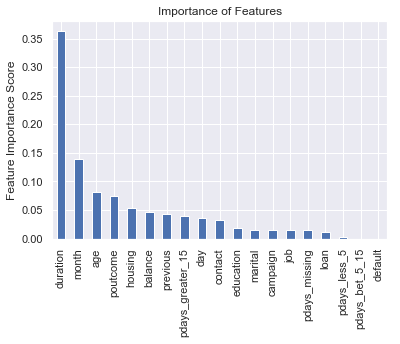

In [45]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, min_samples_leaf=1,max_features='sqrt', random_state=2)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, index=columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

y_pred=baseline.predict(X_test)

print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
print('ROC AUC Score of the GBM on test set: {:.3f}'.format(m.roc_auc_score(y_test,y_pred)))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)
print('Precision recall AUC Score of the GBM on test set: {:.3f}'.format(auc_pr))
    
print(classification_report(y_test, y_pred))


The plot displays the importance of the feature:  In case of GBM duration and month, seems to have high predictive power
With this  model, we obtain 
- a rate of 0.65 of true positives 
- 0.92 true negatives,
- an accuracy of 0.903 and 
- roc_auc of 0.673.
- Precision recall AUC Score - 0.547

Since the data is imbalanced we would rely on AUC score rather than the accuracy score


## Parameter Tuning for GradientBoostingClassifier

### learning_rate
learning rate shrinks the contribution of each tree by learning_rate.

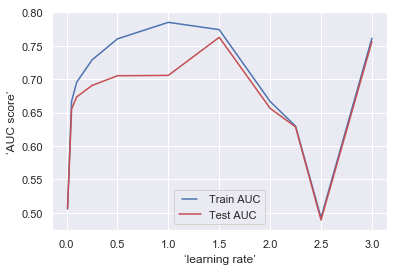

In [46]:
learning_rates = [3,2.5, 2.25, 2 , 1.5,1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("‘AUC score’")
plt.xlabel("‘learning rate’")
plt.show()

### n_estimators 
n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive.

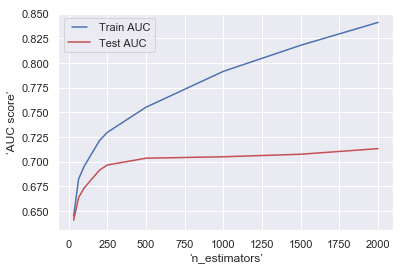

In [47]:
n_estimators = [32, 64, 100, 200,250,500,1000,1500,2000]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("‘AUC score’")
plt.xlabel("‘n_estimators’")
plt.show()

### min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

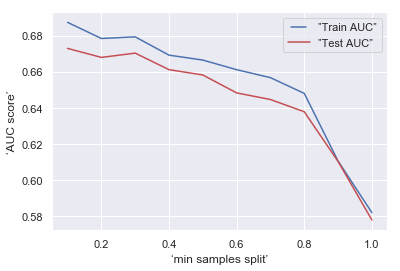

In [48]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='”Train AUC”')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='”Test AUC”')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘AUC score’')
plt.xlabel('‘min samples split’')
plt.show()


### min_samples_leafs
min_samples_leaf is The minimum number of samples required to be at a leaf node. This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs

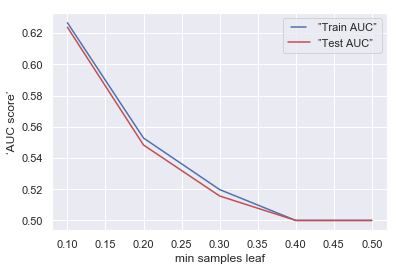

In [49]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="”Train AUC”")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="”Test AUC”")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("‘AUC score’")
plt.xlabel("min samples leaf")
plt.show()

### max_features
max_features represents the number of features to consider when looking for the best split.

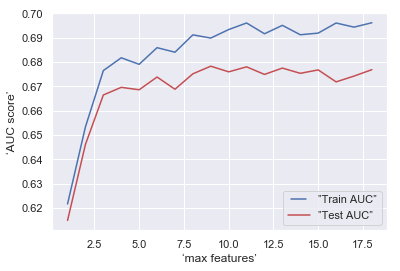

In [50]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='”Train AUC”')
line2, = plt.plot(max_features, test_results, 'r', label='”Test AUC”')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('‘AUC score’')
plt.xlabel('‘max features’')
plt.show()

### GradientBoostingClassifier using GridSearchCV

In [51]:
from time import time
param_dist = {'learning_rate':[0.5, 1.0,1.5], 
              'n_estimators':[250,500,1000],
              'max_features':['sqrt',17,'log2']}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=2),verbose=5, 
            param_grid = param_dist, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

start = time()
tuning.fit(X_train,y_train.values.ravel())
print("GridSearchCV took %.2f seconds"
       " parameter settings." % (time() - start))
tuning.grid_scores_, tuning.best_params_, tuning.best_score_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 12.2min finished


GridSearchCV took 740.30 seconds parameter settings.


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92478, std: 0.00286, params: {'learning_rate': 0.5, 'max_features': 'sqrt', 'n_estimators': 250},
  mean: 0.92256, std: 0.00263, params: {'learning_rate': 0.5, 'max_features': 'sqrt', 'n_estimators': 500},
  mean: 0.91719, std: 0.00327, params: {'learning_rate': 0.5, 'max_features': 'sqrt', 'n_estimators': 1000},
  mean: 0.92327, std: 0.00283, params: {'learning_rate': 0.5, 'max_features': 17, 'n_estimators': 250},
  mean: 0.91849, std: 0.00337, params: {'learning_rate': 0.5, 'max_features': 17, 'n_estimators': 500},
  mean: 0.91063, std: 0.00381, params: {'learning_rate': 0.5, 'max_features': 17, 'n_estimators': 1000},
  mean: 0.92478, std: 0.00286, params: {'learning_rate': 0.5, 'max_features': 'log2', 'n_estimators': 250},
  mean: 0.92256, std: 0.00263, params: {'learning_rate': 0.5, 'max_features': 'log2', 'n_estimators': 500},
  mean: 0.91719, std: 0.00327, params: {'learning_rate': 0.5, 'max_features': 'log2', 'n_estimators': 1000},
  mean: 0.90675, std: 0.00474, params

### Tuned GradientBoostingClassifier

Lets tune the model using the best parameters from GridSearchCV

Accuracy of the GBM on test set: 0.906
ROC AUC Score of the GBM on test set: 0.711
Precision recall AUC Score of the GBM on test set: 0.580
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     11977
          1       0.64      0.46      0.53      1587

avg / total       0.90      0.91      0.90     13564



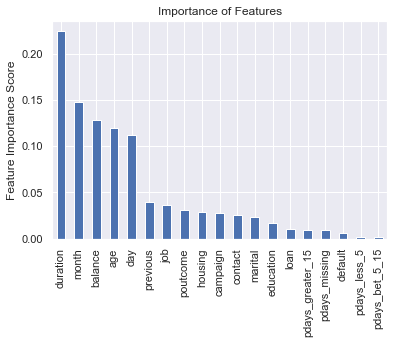

In [52]:
tuned_gbm = GradientBoostingClassifier(learning_rate=0.5, n_estimators=250,max_depth=3, 
                                      max_features='sqrt', random_state=2)
tuned_gbm.fit(X_train,y_train)
# predictors=list(X_train)
feat_imp = pd.Series(tuned_gbm.feature_importances_, index=columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

y_pred=tuned_gbm.predict(X_test)

print('Accuracy of the GBM on test set: {:.3f}'.format(tuned_gbm.score(X_test, y_test)))
print('ROC AUC Score of the GBM on test set: {:.3f}'.format(m.roc_auc_score(y_test, y_pred)))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)
print('Precision recall AUC Score of the GBM on test set: {:.3f}'.format(auc_pr))
    
print(classification_report(y_test, y_pred))

We see a improvement in the performance metrics with the tuned parameters in terms of class level metrics

In [53]:
print('\nConfusion matrix of GBM optimized for on the test data:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))


Confusion matrix of GBM optimized for on the test data:
     pred_neg  pred_pos
neg     11571       406
pos       864       723


#### Range Estimate at 95% confidence interval

In [54]:
stdev = np.sqrt((sum((tuned_gbm.predict(X_test) - y_test.values.ravel())**2)) / (len(y_test) - 2))
print("Model performance (Precision-Recall AUC score) at 95% confidence interval is :\n {:.2} (+/- {:.2}) [{}]".format(auc_pr, 1.96 * stdev, "Gradient Boost Classifier"))

print("Model performance (ROC-AUC score) at 95% confidence interval is :\n {:.2} (+/- {:.2}) [{}]".format(m.roc_auc_score(y_test, y_pred), 1.96 * stdev, "Gradient Boost Classifier"))

Model performance (Precision-Recall AUC score) at 95% confidence interval is :
 0.58 (+/- 0.6) [Gradient Boost Classifier]
Model performance (ROC-AUC score) at 95% confidence interval is :
 0.71 (+/- 0.6) [Gradient Boost Classifier]


## Conclusion

The GradientBoostingClassifie model gave the best performance score among all tested models. Though the existing customers’ subset is very small (highly imbalanced), probably we could improve the model performance further by collecting more data for postive class.

